In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d salmaneunus/railway-track-fault-detection

Dataset URL: https://www.kaggle.com/datasets/salmaneunus/railway-track-fault-detection
License(s): copyright-authors
 99% 1.99G/2.00G [00:27<00:00, 98.8MB/s]
100% 2.00G/2.00G [00:27<00:00, 79.2MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/railway-track-fault-detection.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential, Model
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

In [ ]:
train_add = '/content/Railway Track fault Detection Updated/Train'
test_add = '/content/Railway Track fault Detection Updated/Test'
validation_add = '/content/Railway Track fault Detection Updated/Validation'

In [ ]:
train_def = pd.DataFrame(os.listdir(train_add + '/Defective'))
train_ndef = pd.DataFrame(os.listdir(train_add + '/Non defective'))
test_def = pd.DataFrame(os.listdir(test_add + '/Defective'))
test_ndef = pd.DataFrame(os.listdir(test_add + '/Non defective'))
val_def = pd.DataFrame(os.listdir(validation_add + '/Defective'))
val_ndef = pd.DataFrame(os.listdir(validation_add + '/Non defective'))

In [ ]:
print("Size of training dataset: ", len(train_def)+len(train_ndef))
print("Size of test dataset: ", len(test_def)+len(test_ndef))
print("Size of validation dataset: ", len(val_def)+len(val_ndef))

Size of training dataset:  300
Size of test dataset:  22
Size of validation dataset:  62


In [ ]:
print("Train Defective count:", len(train_def))
print("Train Non defective count", len(train_ndef))
print("Test Defective count:", len(test_def))
print("Test Non defective count", len(test_ndef))
print("Validation Defective count:", len(val_def))
print("Validation Non defective count", len(val_ndef))

Train Defective count: 150
Train Non defective count 150
Test Defective count: 11
Test Non defective count 11
Validation Defective count: 31
Validation Non defective count 31


Defective data sample



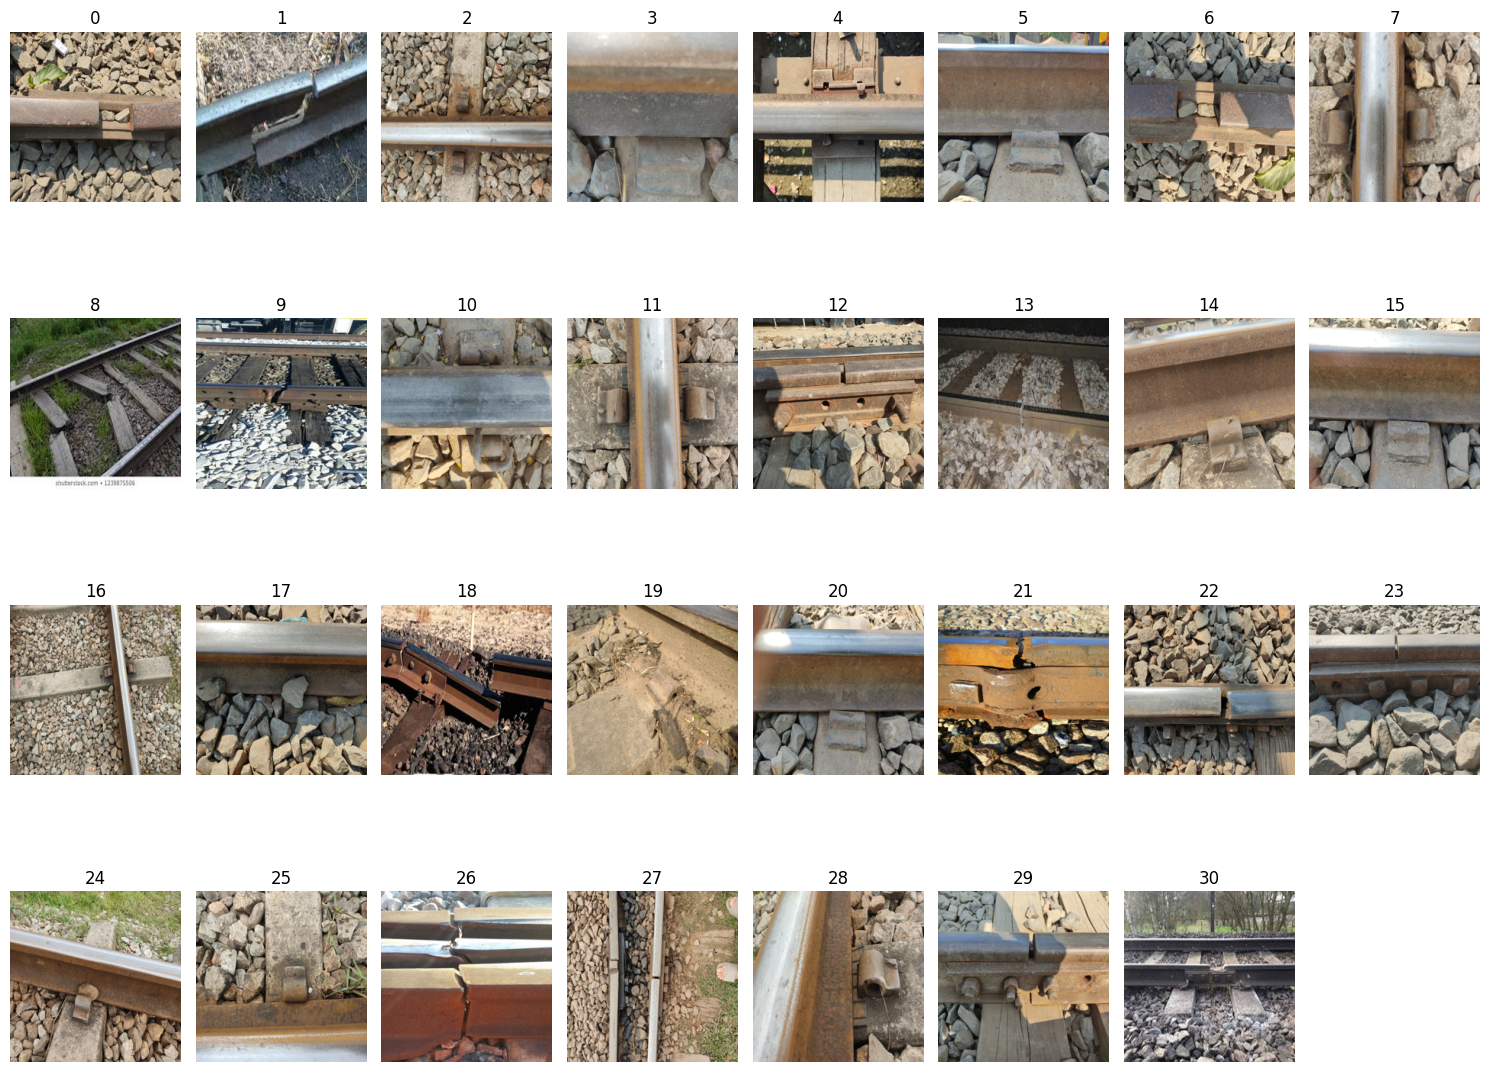

In [ ]:
print("Defective data sample\n")
plt.figure(figsize = (15,12))
for idx,image_path in enumerate(train_def[0]):
    if idx==31:
        break
    plt.subplot(4,8,idx+1)
    img = Image.open('/content/Railway Track fault Detection Updated/Train/Defective/'+image_path)
    img = img.resize((224,224))
    plt.imshow(img)
    plt.axis('off')
    plt.title(idx)
plt.tight_layout()
plt.show()

Non defective data sample



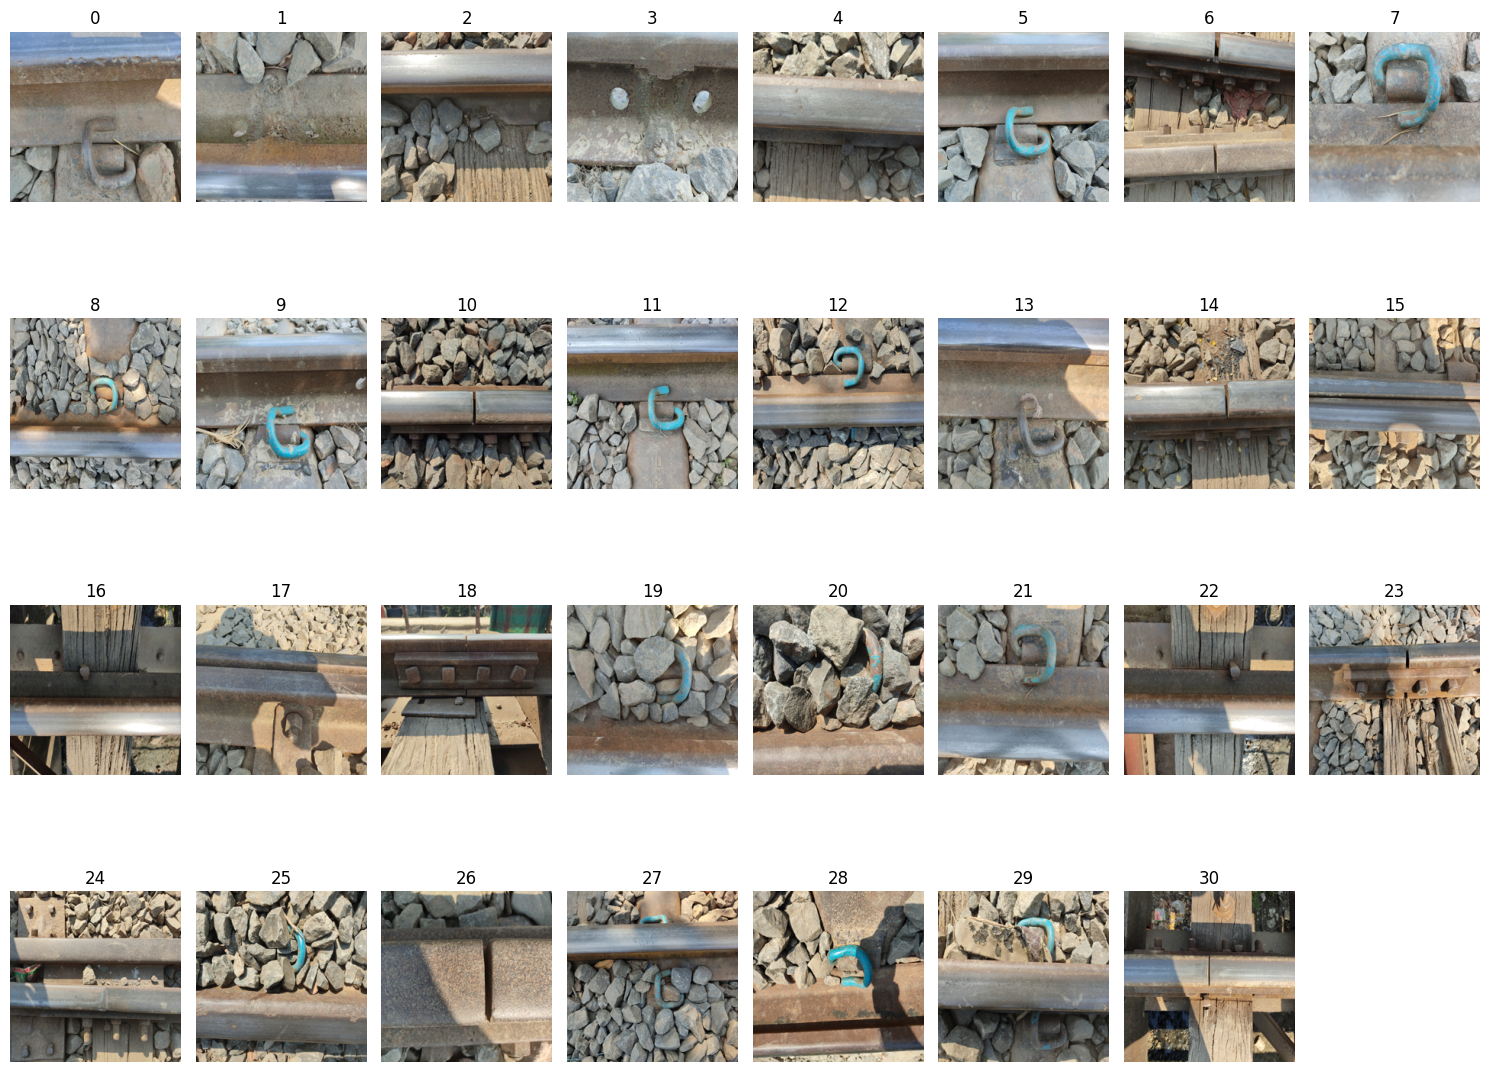

In [ ]:
print("Non defective data sample\n")
plt.figure(figsize = (15,12))
for idx,image_path in enumerate(train_ndef[0]):
    if idx==31:
        break
    plt.subplot(4,8,idx+1)
    img = Image.open('/content/Railway Track fault Detection Updated/Train/Non defective/'+image_path)
    img = img.resize((224,224))
    plt.imshow(img)
    plt.axis('off')
    plt.title(idx)
plt.tight_layout()
plt.show()

In [ ]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/Railway Track fault Detection Updated/Train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/Railway Track fault Detection Updated/Validation',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

test_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/Railway Track fault Detection Updated/Test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 299 files belonging to 2 classes.
Found 62 files belonging to 2 classes.
Found 22 files belonging to 2 classes.


In [ ]:
def normalize(image, label):
  image = tf.cast(image/256, tf.float32)
  return image, label

In [ ]:
train_ds = train_ds.map(normalize)
validation_ds = validation_ds.map(normalize)
test_ds = test_ds.map(normalize)

In [ ]:
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras.regularizers import l2

In [ ]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

In [ ]:
batch_size = 32

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        '/content/Railway Track fault Detection Updated/Train',
        target_size=(256,256),
        batch_size=batch_size,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        '/content/Railway Track fault Detection Updated/Validation',
        target_size=(256,256),
        batch_size=batch_size,
        class_mode='binary')

Found 299 images belonging to 2 classes.
Found 62 images belonging to 2 classes.


In [ ]:
model = Sequential()

model.add(Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), padding='valid'))
model.add(Dropout(0.3))

model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), padding='valid'))
model.add(Dropout(0.3))

model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), padding='valid'))
model.add(Dropout(0.3))

model.add(Conv2D(256, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), padding='valid'))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.4))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 256, 256, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 128, 128, 32)      0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 128, 128, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 128, 128, 64)      2

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit_generator(train_generator, epochs=10, validation_data=validation_generator, callbacks=[early_stopping, reduce_lr])

Epoch 1/10
10/10 [==============================] - 126s 9s/step - loss: 4.5832 - accuracy: 0.5953 - val_loss: 5.3606 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 2/10
10/10 [==============================] - 129s 10s/step - loss: 5.0094 - accuracy: 0.7559 - val_loss: 7.3066 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 3/10
10/10 [==============================] - 129s 10s/step - loss: 5.0051 - accuracy: 0.7324 - val_loss: 8.1315 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 4/10
10/10 [==============================] - 125s 10s/step - loss: 4.4500 - accuracy: 0.7860 - val_loss: 6.8526 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 5/10
10/10 [==============================] - 124s 10s/step - loss: 3.9037 - accuracy: 0.8294 - val_loss: 5.1945 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 6/10
10/10 [==============================] - 115s 9s/step - loss: 3.4377 - accuracy: 0.8462 - val_loss: 3.7704 - val_accuracy: 0.4516 - lr: 0.0010
Epoch 7/10
10/10 [==============================] - 117s 9s/step - loss:

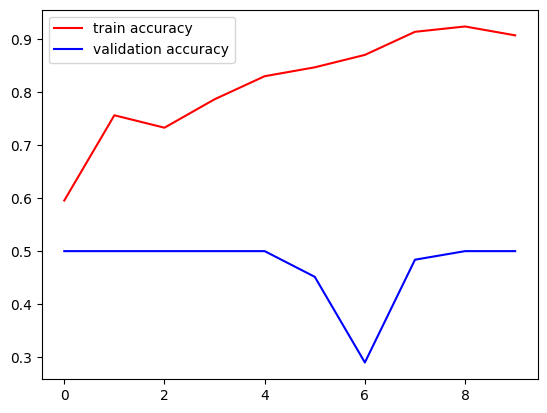

In [ ]:
plt.plot(history.history['accuracy'],color='red',label='train accuracy')
plt.plot(history.history['val_accuracy'],color='blue',label='validation accuracy')
plt.legend()
plt.show()

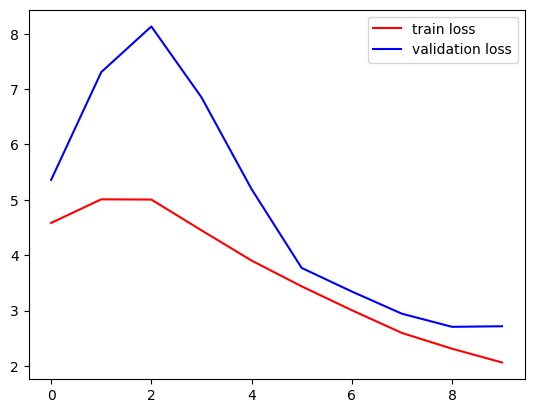

In [ ]:
plt.plot(history.history['loss'],color='red',label='train loss')
plt.plot(history.history['val_loss'],color='blue',label='validation loss')
plt.legend()
plt.show()

In [ ]:
model.evaluate(test_ds)

1/1 [==============================] - 4s 4s/step - loss: 2.7420 - accuracy: 0.5000


[2.742016315460205, 0.5]